# Clustering for gevtevsimbad

In [61]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [6]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [7]:
#name columns included in the final display
other_names = ['s_MAIN_ID', 's_class', 'gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/normalized_spectra.txt"

In [8]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,tev_3TeV,tev_10TeV,tev_30TeV,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,0.013537,0.343081,0.020826,0.143005,0.330419,0.0,0.0,0.000000,0.000000,0.0,...,0.012135,0.004136,0.000407,b'SSTGC 519103',Be,b' ',b' ',b'',b'unid',0
1,0.013335,0.013325,0.000805,0.014451,0.004808,0.0,0.0,0.004396,0.019638,0.0,...,0.007655,0.004429,0.002622,b'LS IV -05 11',B,b' ',b'PWN ',b'',b'unid',0
2,0.001682,0.042624,0.002587,0.017767,0.041051,0.0,0.0,0.000000,0.000000,0.0,...,0.001508,0.000514,0.000051,b'GCIRS 1W',B,b' ',b' ',b'',b'unid',0
3,0.011399,0.129145,0.001246,0.070802,0.082033,0.0,0.0,0.000000,0.000000,0.0,...,0.000969,0.000719,0.001111,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
4,0.012809,0.324638,0.019706,0.135318,0.312657,0.0,0.0,0.000000,0.000000,0.0,...,0.011482,0.003914,0.000385,b'GCIRS 8',O,b' ',b' ',b'',b'unid',0


In [9]:
spectrum_columns = spectra.columns[:-len(other_names)]

In [10]:
spectra[spectrum_columns].sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
     ... 
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
65    1.0
66    1.0
67    1.0
Length: 68, dtype: float64

In [12]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [62]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

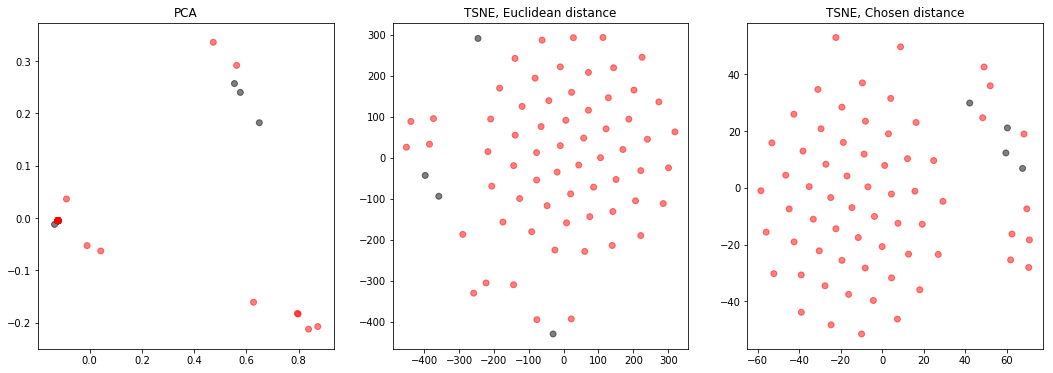

In [63]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=200)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

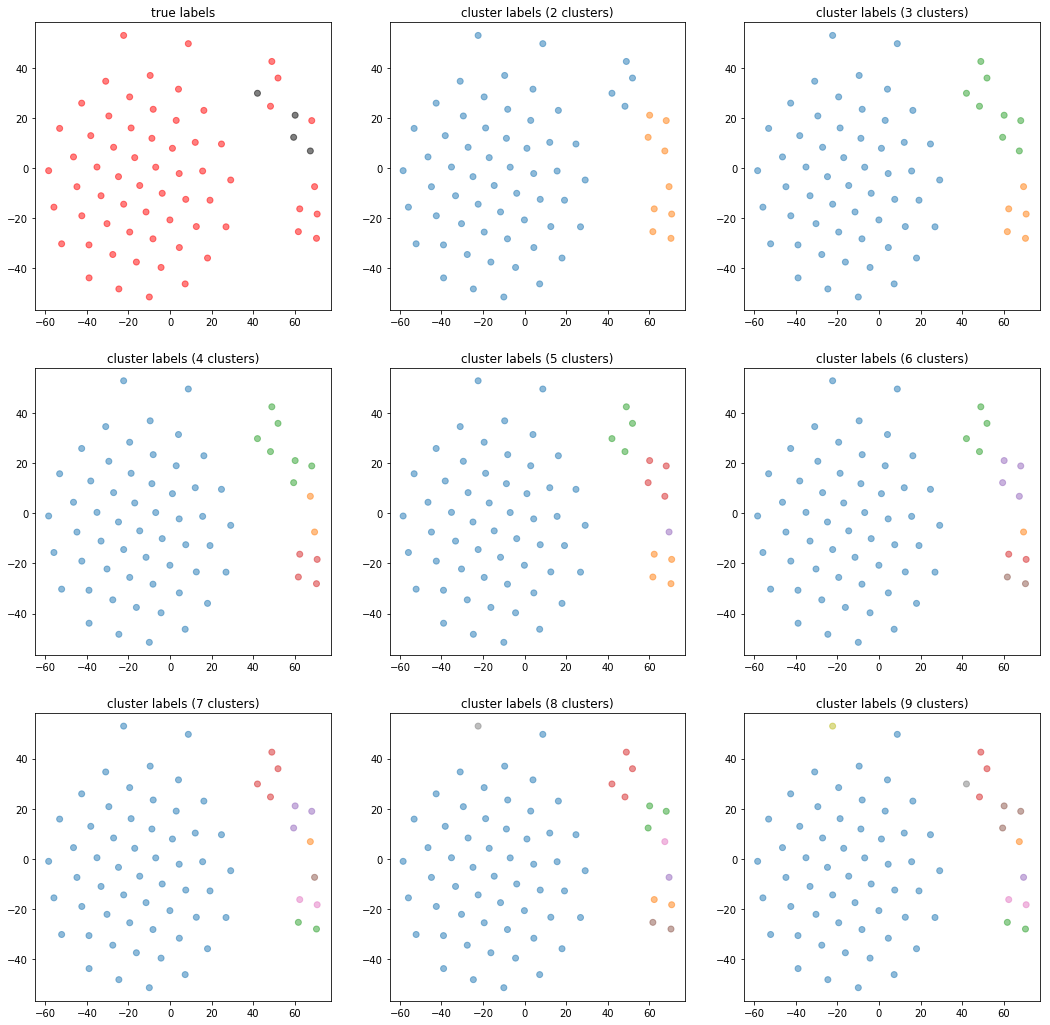

In [64]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42, learning_rate=500)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=200)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 18))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [65]:
n = 5

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
10,b'[CHP2004] J095549.8+693934',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
11,b'[MTK2001b] 8',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
12,b'[CHP2004] J095637.5+694137',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
13,b'CXOU J095601.7+694308',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
14,b'CXOU J095548.9+694010',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
15,b'CXOU J095527.1+693923',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
16,b'CXOU J095552.8+694020',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
17,b'CXOU J095552.4+694024',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
18,b'CXOU J095550.7+694039',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
19,b'CXOU J095547.5+694120',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'GCIRS 1W',B,b' ',b' ',b'',b'unid',0
5,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
6,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
56,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',b'',b'unid',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b'SSTGC 519103',Be,b' ',b' ',b'',b'unid',0
1,b'LS IV -05 11',B,b' ',b'PWN ',b'',b'unid',0
4,b'GCIRS 8',O,b' ',b' ',b'',b'unid',0
38,b'2FGL J1019.0-5856',B0Ve,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
7,b'[MT91] 213',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',1
8,b'Schulte 21',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',0
9,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
60,b'V* V479 Sct',B0Ve,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',1


4 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.116499,0.289255,0.241801,0.120674,0.230597,0.0,5.612093e-15,2.234217e-14,2.244630e-08,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006828,0.044097,0.001162,0.024807,0.030465,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.002988,0.004084,0.002664,0.001470,0.000885
2,0.011548,0.226707,0.087762,0.095433,0.250905,0.0,0.000000e+00,1.099091e-03,4.909455e-03,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.013058,0.012331,0.008216,0.003650,0.001913
3,0.000752,0.011981,0.008885,0.007465,0.010853,0.0,1.394698e-04,1.287994e-04,9.119498e-04,0.001722,...,0.0,0.000069,0.000515,0.001706,0.0,0.001755,0.001371,0.000982,0.000508,0.000166
4,0.011399,0.129145,0.001246,0.070802,0.082033,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.005744,0.000322,0.000969,0.000719,0.001111


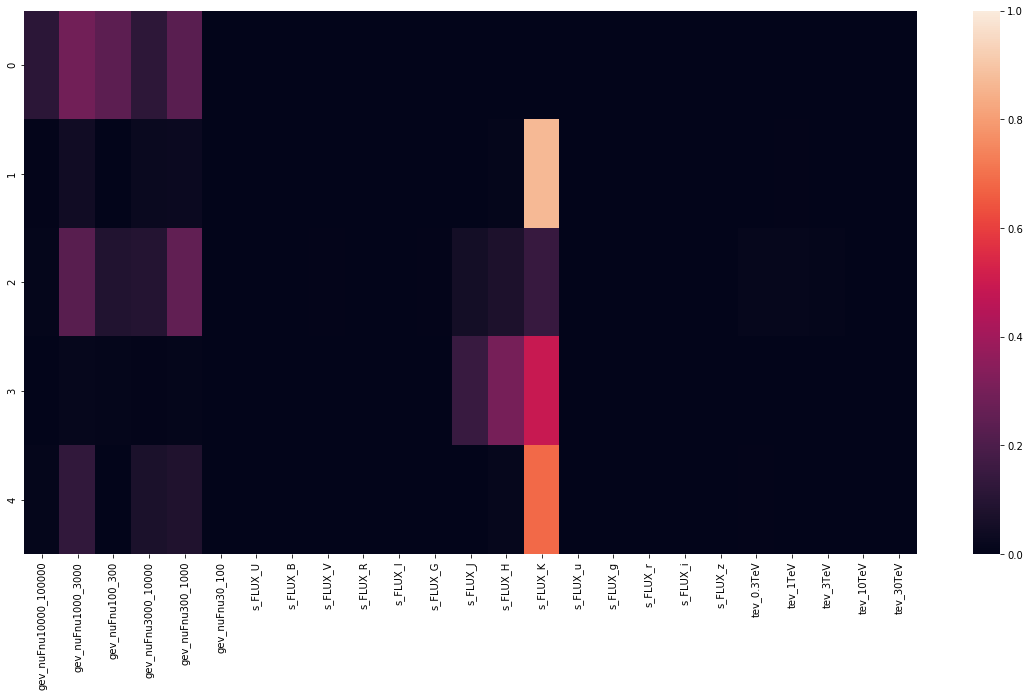

In [66]:
# centroids
display(centers)

plt.figure(figsize=(20, 10))
sns.heatmap(centers, vmin=0, vmax=1)
plt.show()

In [117]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

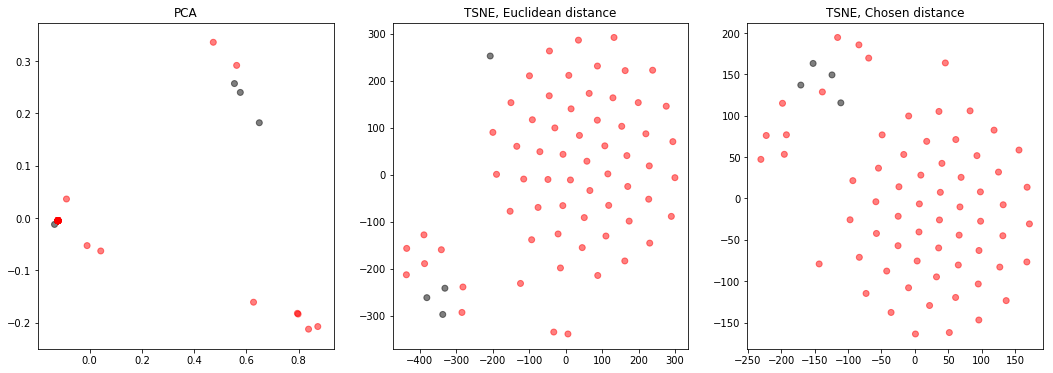

In [129]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=500, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=500)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

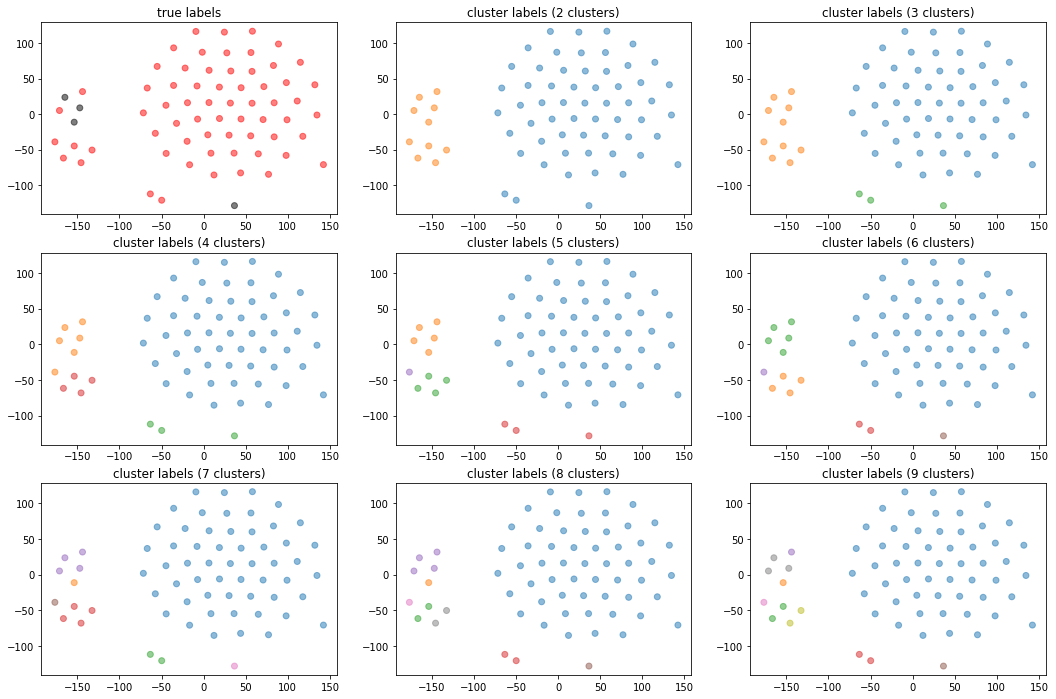

In [119]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=500)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [120]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
10,b'[CHP2004] J095549.8+693934',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
11,b'[MTK2001b] 8',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
12,b'[CHP2004] J095637.5+694137',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
13,b'CXOU J095601.7+694308',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
14,b'CXOU J095548.9+694010',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
15,b'CXOU J095527.1+693923',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
16,b'CXOU J095552.8+694020',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
17,b'CXOU J095552.4+694024',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
18,b'CXOU J095550.7+694039',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
19,b'CXOU J095547.5+694120',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'GCIRS 1W',B,b' ',b' ',b'',b'unid',0
5,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
6,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
56,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',b'',b'unid',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b'LS IV -05 11',B,b' ',b'PWN ',b'',b'unid',0
7,b'[MT91] 213',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',1
8,b'Schulte 21',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',0
9,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
60,b'V* V479 Sct',B0Ve,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',1


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b'SSTGC 519103',Be,b' ',b' ',b'',b'unid',0
4,b'GCIRS 8',O,b' ',b' ',b'',b'unid',0


4 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0


5 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
38,b'2FGL J1019.0-5856',B0Ve,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.116499,0.289255,0.241801,0.120674,0.230597,0.0,5.612093e-15,2.234217e-14,2.244630e-08,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006828,0.044097,0.001162,0.024807,0.030465,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.002988,0.004084,0.002664,0.001470,0.000885
2,0.003268,0.012250,0.007269,0.008862,0.009644,0.0,1.115758e-04,9.823123e-04,4.657124e-03,0.001378,...,0.0,0.000056,0.000412,0.001365,0.0,0.002559,0.003551,0.002316,0.001292,0.000657
3,0.013173,0.333859,0.020266,0.139161,0.321538,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.021575,0.017505,0.011808,0.004025,0.000396
4,0.011399,0.129145,0.001246,0.070802,0.082033,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.005744,0.000322,0.000969,0.000719,0.001111
5,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.003307,0.002040,0.001594,0.002120,0.004238


In [121]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

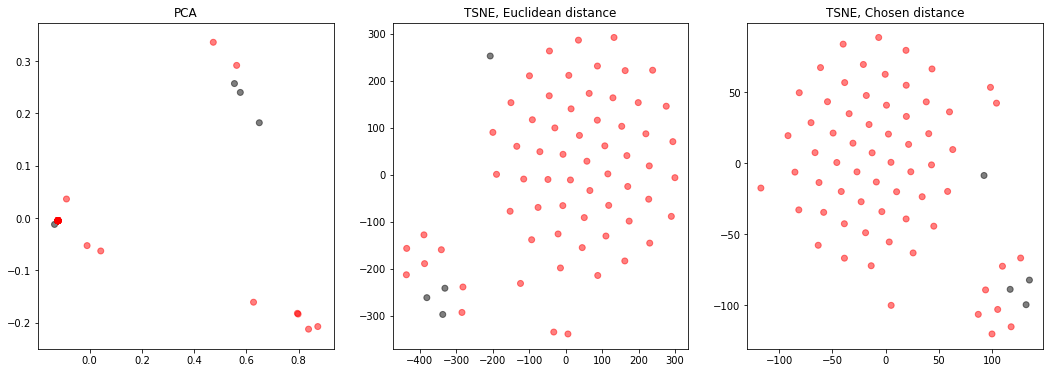

In [122]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=500, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=400)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

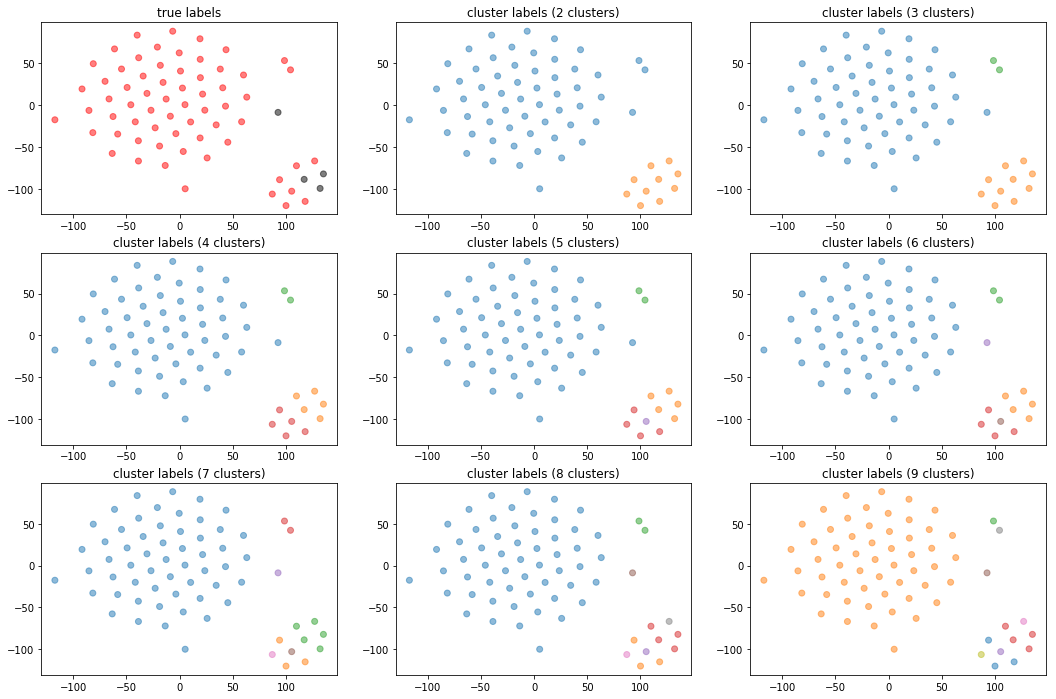

In [123]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=400)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [124]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
10,b'[CHP2004] J095549.8+693934',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
11,b'[MTK2001b] 8',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
12,b'[CHP2004] J095637.5+694137',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
13,b'CXOU J095601.7+694308',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
14,b'CXOU J095548.9+694010',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
15,b'CXOU J095527.1+693923',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
16,b'CXOU J095552.8+694020',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
17,b'CXOU J095552.4+694024',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
18,b'CXOU J095550.7+694039',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
19,b'CXOU J095547.5+694120',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b'LS IV -05 11',B,b' ',b'PWN ',b'',b'unid',0
7,b'[MT91] 213',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',1
8,b'Schulte 21',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',0
9,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
60,b'V* V479 Sct',B0Ve,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',1


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b'SSTGC 519103',Be,b' ',b' ',b'',b'unid',0
4,b'GCIRS 8',O,b' ',b' ',b'',b'unid',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'GCIRS 1W',B,b' ',b' ',b'',b'unid',0
5,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
6,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
56,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',b'',b'unid',0


4 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
38,b'2FGL J1019.0-5856',B0Ve,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1


5 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.116499,0.289255,0.241801,0.120674,0.230597,0.0,5.612093e-15,2.234217e-14,2.244630e-08,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003268,0.012250,0.007269,0.008862,0.009644,0.0,1.115758e-04,9.823123e-04,4.657124e-03,0.001378,...,0.0,0.000056,0.000412,0.001365,0.0,0.002559,0.003551,0.002316,0.001292,0.000657
2,0.013173,0.333859,0.020266,0.139161,0.321538,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.021575,0.017505,0.011808,0.004025,0.000396
3,0.006828,0.044097,0.001162,0.024807,0.030465,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.002988,0.004084,0.002664,0.001470,0.000885
4,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.003307,0.002040,0.001594,0.002120,0.004238
5,0.011399,0.129145,0.001246,0.070802,0.082033,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.005744,0.000322,0.000969,0.000719,0.001111


In [125]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

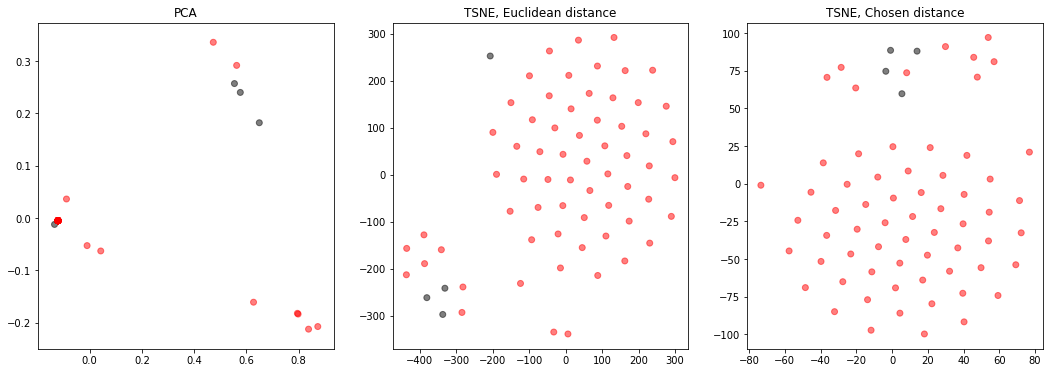

In [126]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=500, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

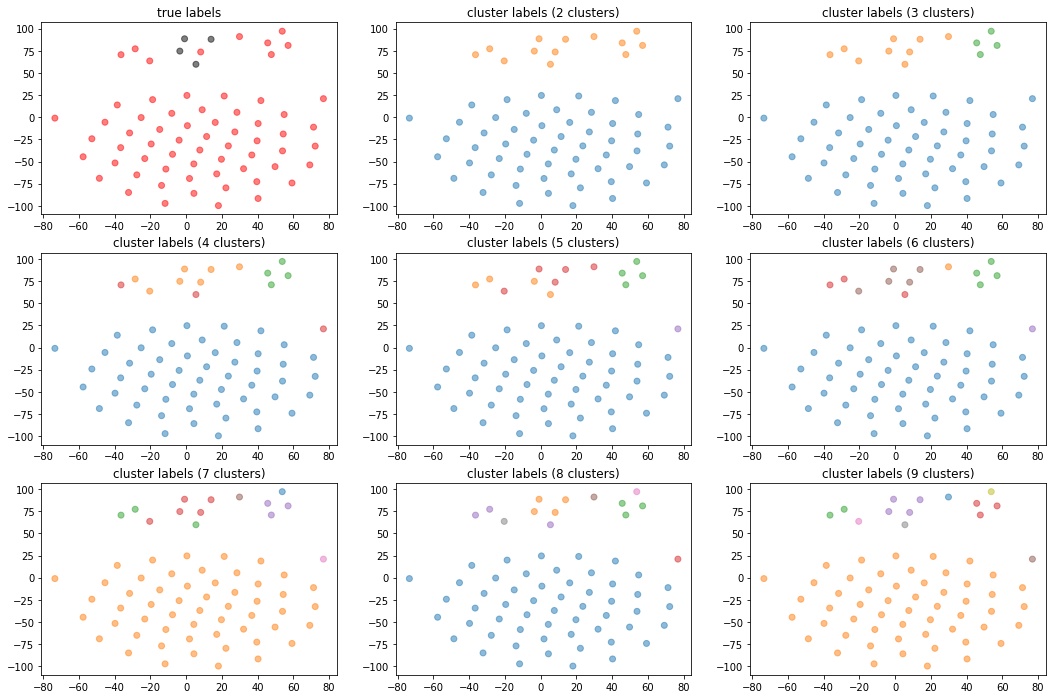

In [127]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [128]:
n = 3

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
10,b'[CHP2004] J095549.8+693934',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
11,b'[MTK2001b] 8',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
12,b'[CHP2004] J095637.5+694137',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
13,b'CXOU J095601.7+694308',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
14,b'CXOU J095548.9+694010',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
15,b'CXOU J095527.1+693923',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
16,b'CXOU J095552.8+694020',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
17,b'CXOU J095552.4+694024',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
18,b'CXOU J095550.7+694039',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
19,b'CXOU J095547.5+694120',B0Ve,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b'SSTGC 519103',Be,b' ',b' ',b'',b'unid',0
1,b'LS IV -05 11',B,b' ',b'PWN ',b'',b'unid',0
3,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
4,b'GCIRS 8',O,b' ',b' ',b'',b'unid',0
7,b'[MT91] 213',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',1
8,b'Schulte 21',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',0
9,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
38,b'2FGL J1019.0-5856',B0Ve,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1
60,b'V* V479 Sct',B0Ve,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',1


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'GCIRS 1W',B,b' ',b' ',b'',b'unid',0
5,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
6,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',b'',b'unid',0
56,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',b'',b'unid',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.116499,0.289255,0.241801,0.120674,0.230597,0.0,5.612093e-15,2.234217e-14,2.244630e-08,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006733,0.120433,0.043093,0.053599,0.125451,0.0,6.198658e-05,5.457291e-04,2.587291e-03,0.000765,...,0.0,0.000031,0.000229,0.000758,0.0,0.007222,0.006125,0.004196,0.001928,0.001047
2,0.006828,0.044097,0.001162,0.024807,0.030465,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.002988,0.004084,0.002664,0.001470,0.000885
